In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\manth\Downloads\customer_shopping_data.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
# check the number of rows and columns
df.shape

(99457, 10)

In [4]:
# check  the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
# check the null values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
# check the duplicate values
df.duplicated().sum()

0

In [7]:
# check the statistical
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


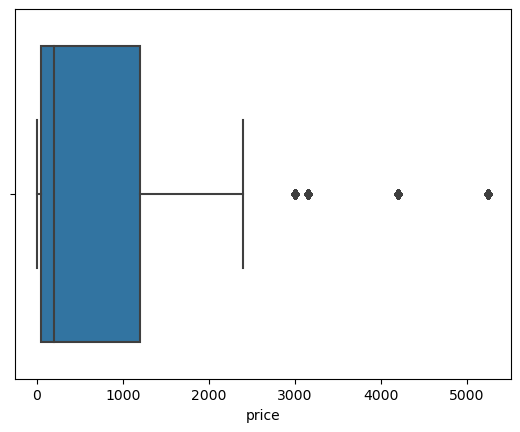

In [8]:
# check the outlier
sns.boxplot(df['price'])
plt.show()

In [9]:
import numpy as np

In [10]:
q1,q3 = np.percentile(df['price'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outlier = df['price'][(df['price']<lower)|(df['price']>upper)]
print(outlier)

3        3000.85
15       3000.85
23       5250.00
53       4200.00
69       5250.00
          ...   
99332    3000.85
99374    3150.00
99387    3150.00
99424    3150.00
99455    4200.00
Name: price, Length: 5024, dtype: float64


In [11]:
df = df[df['price']<=3100]

In [12]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


In [13]:
df['price'].max()

3000.85

In [14]:
# data visualization

In [15]:
b = df['gender'].value_counts()

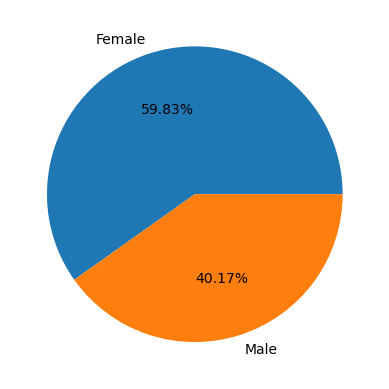

In [16]:
plt.pie(x = b.values,labels = b.index,autopct = '%.2f%%')
plt.show()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


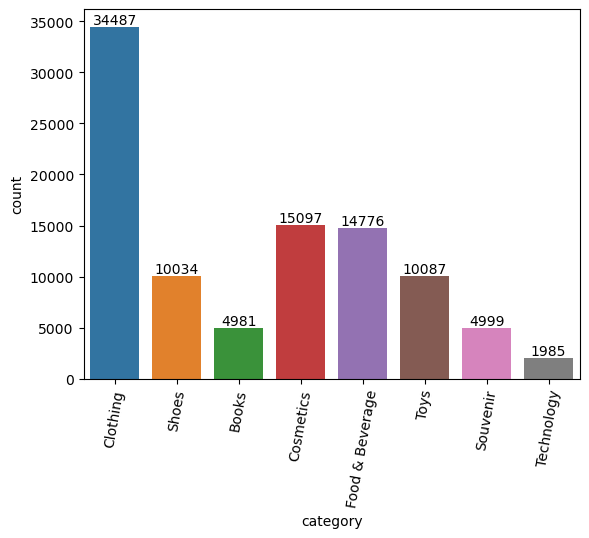

In [17]:
a = sns.countplot(df['category'])
plt.xticks(rotation = 80)
a.bar_label(container = a.containers[0])
plt.show()

In [18]:
c = df['payment_method'].value_counts()

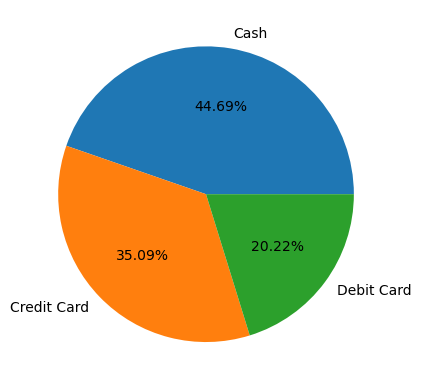

In [19]:
plt.pie(x = c.values,labels = c.index,autopct = '%.2f%%')
plt.show()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


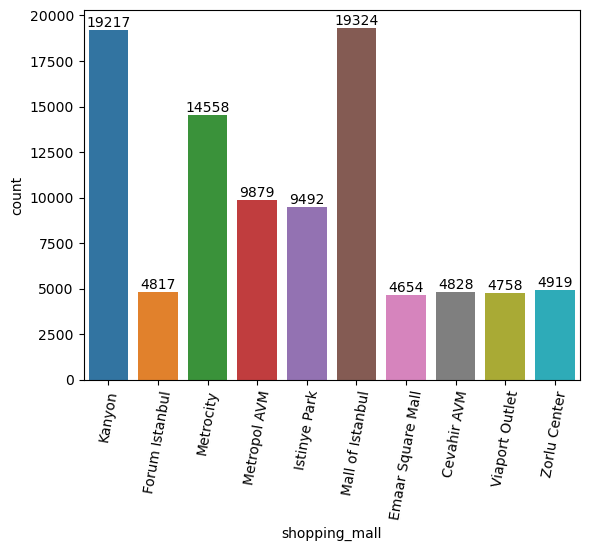

In [20]:
d = sns.countplot(df['shopping_mall'])
plt.xticks(rotation = 80)
d.bar_label(container = d.containers[0])
plt.show()

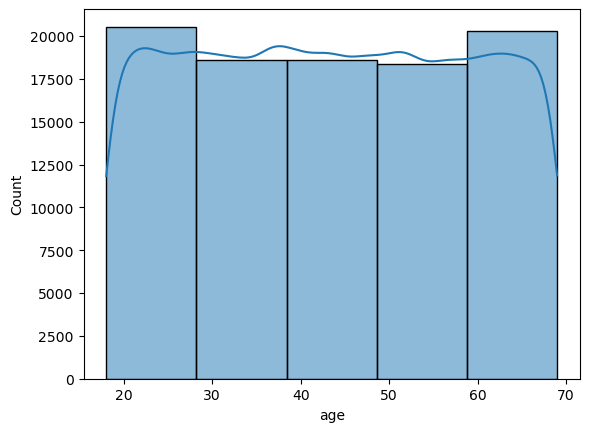

In [22]:
sns.histplot(df['age'],kde = True,bins = 5)
plt.show()

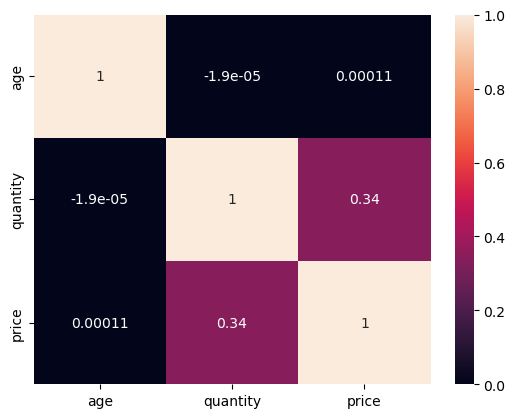

In [23]:
cor = df.corr()
sns.heatmap(cor,annot = True)
plt.show()

In [31]:
e = df.groupby('category')['quantity'].sum().sort_values(ascending = False)

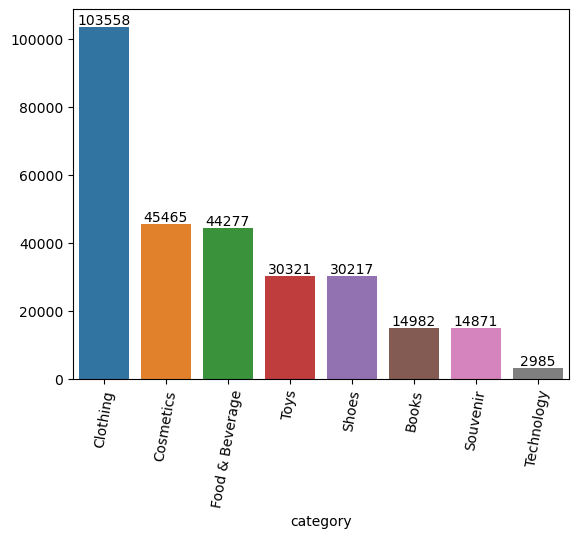

In [32]:
zala = sns.barplot(x = e.index,y = e.values,data = df)
plt.xticks(rotation = 80)
zala.bar_label(container = zala.containers[0])
plt.show()